In [1]:
import os
os.chdir("..")

In [2]:
from shell.datasets.datasets import MNIST, FashionMNIST, KMNIST, CIFAR100
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
import torch
from shell.utils.utils import seed_everything

seed_everything(0)

In [3]:
num_train = -1
dataCls = [MNIST, FashionMNIST, KMNIST, CIFAR100]
datasets = [cls(num_train_per_task=num_train) for cls in dataCls]

without replacement!! [5 0 3 4 2 6 7 1 8 9]
without replacement!! [1 9 8 4 5 2 6 3 0 7]
without replacement!! [6 0 1 3 7 2 4 9 8 5]
without replacement!! [65 44 17 47 82 95 30 41 98 81 96 93 70 77 60 84  8 15 26 27  1 88  3 72
 63 75  6 79 32 97 68 23 52 22  7 73 86 39 38 19 34 21 71 10 29 35 16 25
 20 49 66 13 40 91 76 61 99  5 14 92 87  2 42 55 56 24  9 33 11 89 78 43
 94  4 54 67 58  0 50 28 53 62 59 37 90 69 74 85 83 36 46 31 48 45 80 12
 64 18 57 51]


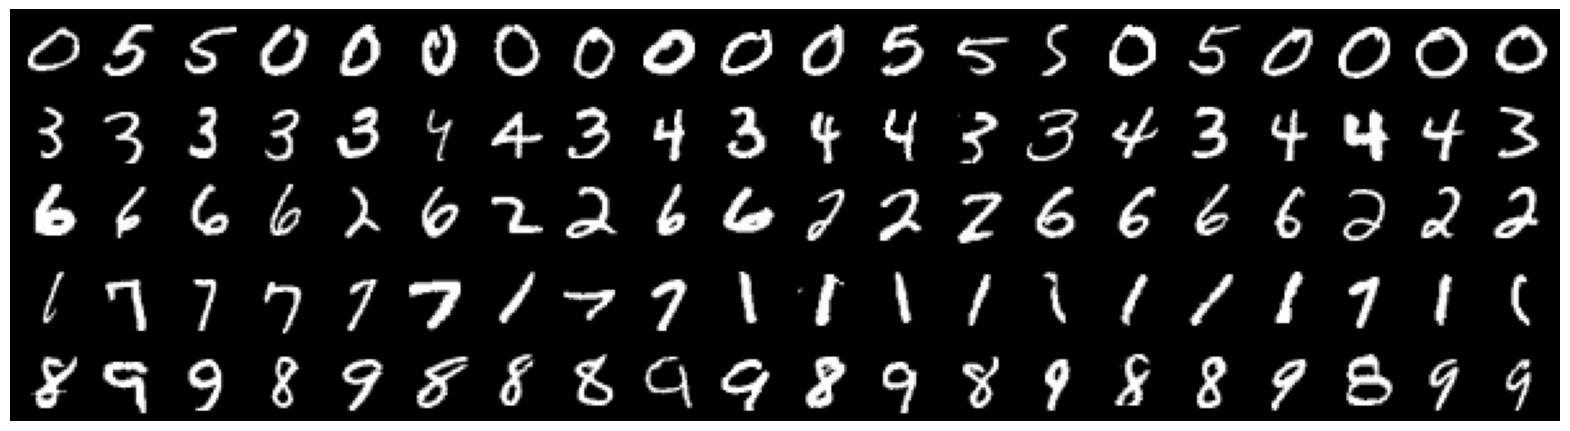

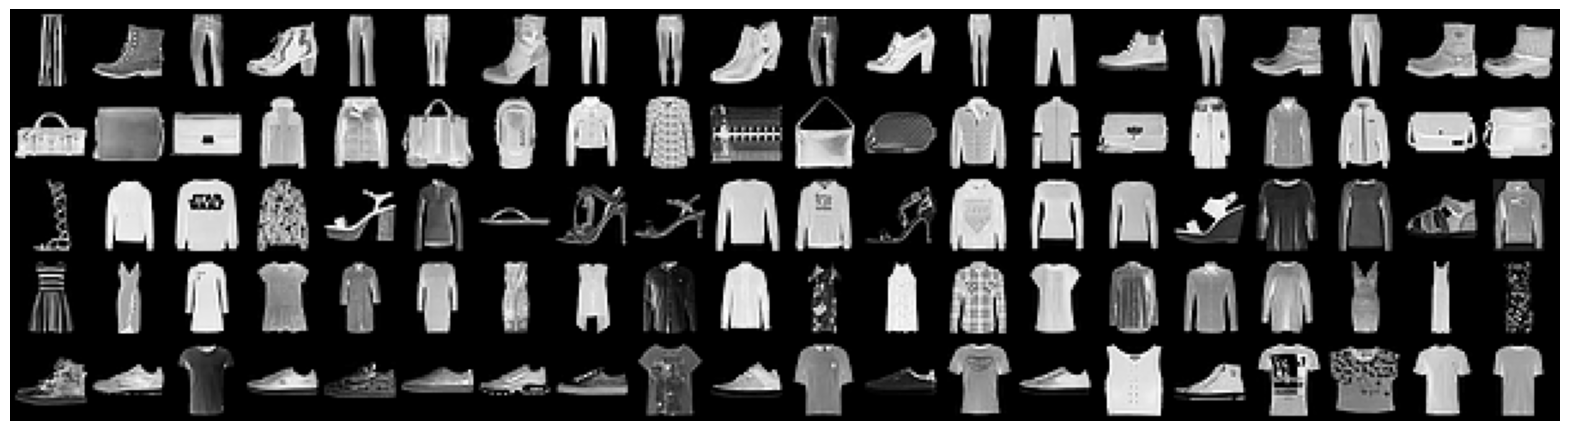

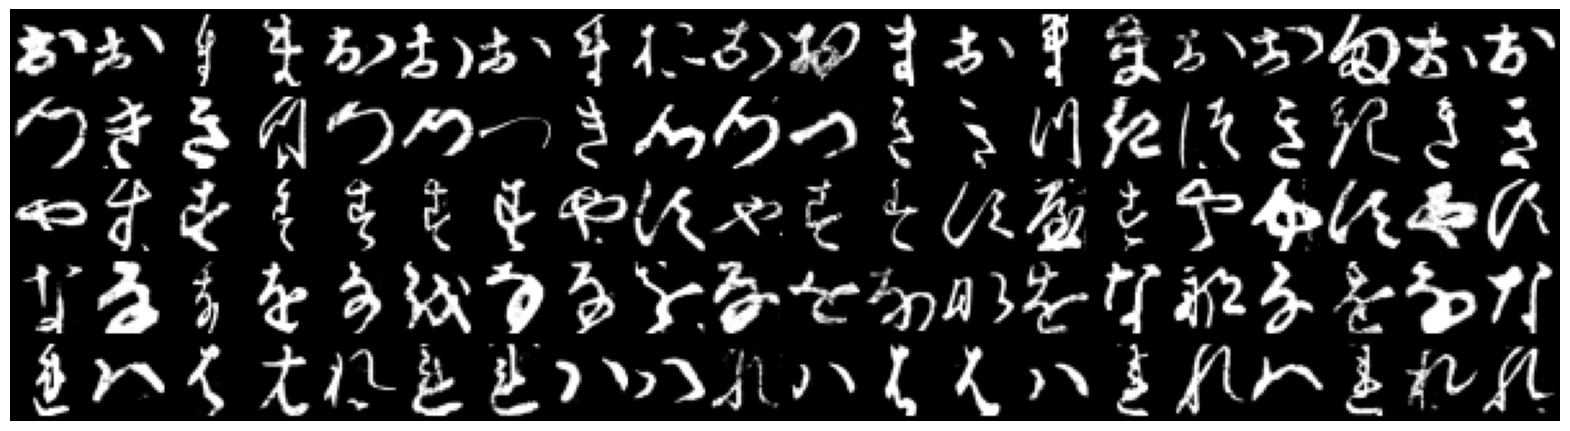

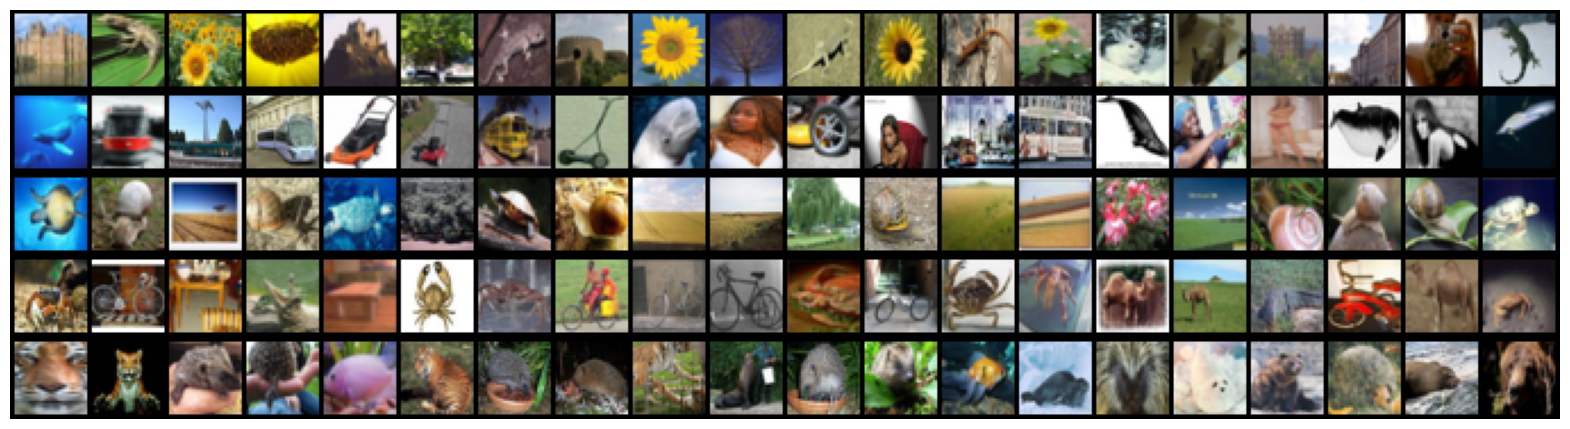

In [6]:
for dataset in datasets:
    # num_tasks = len(dataset.trainset)
    num_tasks = 5
    # n_images_per_task = 20 if dataset.name == "cifar100" else 10
    n_images_per_task = 20
    X_tasks = []
    for task in range(num_tasks):
        task_dataset = dataset.trainset[task]
        X = task_dataset.tensors[0]
        X = X[:n_images_per_task]
        X_task = make_grid(X, nrow=n_images_per_task)
        X_tasks.append(X_task)
    X = torch.cat(X_tasks, dim=1)

    plt.figure(figsize=(20, 8))
    plt.imshow(X.permute(1, 2, 0))
    plt.axis("off")
    # save image at Figures/datasets/dataset.name
    plt.savefig(f"Figures/datasets/{dataset.name}.pdf", bbox_inches="tight")

In [ ]:
# plot the class distribution (assuming global labels i.e. no remapping labels, no sampling with replacement)
Y = []
for dataset in datasets:
    num_tasks = len(dataset.trainset)
    y = []
    for task in range(num_tasks):
        tensordataset = dataset.trainset[task]
        y.append(tensordataset.tensors[1])
    y = torch.cat(y)
    Y.append(y)
    plt.figure(figsize=(10, 5))
    plt.hist(y, bins=dataset.num_classes)
    plt.xlabel("Class")
    plt.ylabel("Frequency")
    plt.title(f"Dataset:{dataset.name}")
    # plt.xticks(range(dataset.num_classes))